In [129]:
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union
import rasterio.mask
from rasterio.features import rasterize
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras.backend as K
from keras.losses import binary_crossentropy
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout, Concatenate
from keras.layers import GlobalAveragePooling2D, UpSampling2D, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
%matplotlib inline

In [130]:
raster_path = "T36UXV_20200406T083559_TCI_10m.jp2"

In [131]:
with rasterio.open(raster_path, "r", driver="JP2OpenJPEG") as src:
    raster_img = src.read()
    raster_meta = src.meta

In [132]:
raster_meta 

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint8',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 3,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 5500020.0)}

In [133]:
raster_img = reshape_as_image(raster_img)
raster_img.shape

(10980, 10980, 3)

In [134]:
#Resize img
img = cv2.imread('T36UXV_20200406T083559_TCI_10m.jp2')
raster_img = cv2.resize(img, dsize=(768, 768), interpolation=cv2.INTER_CUBIC)

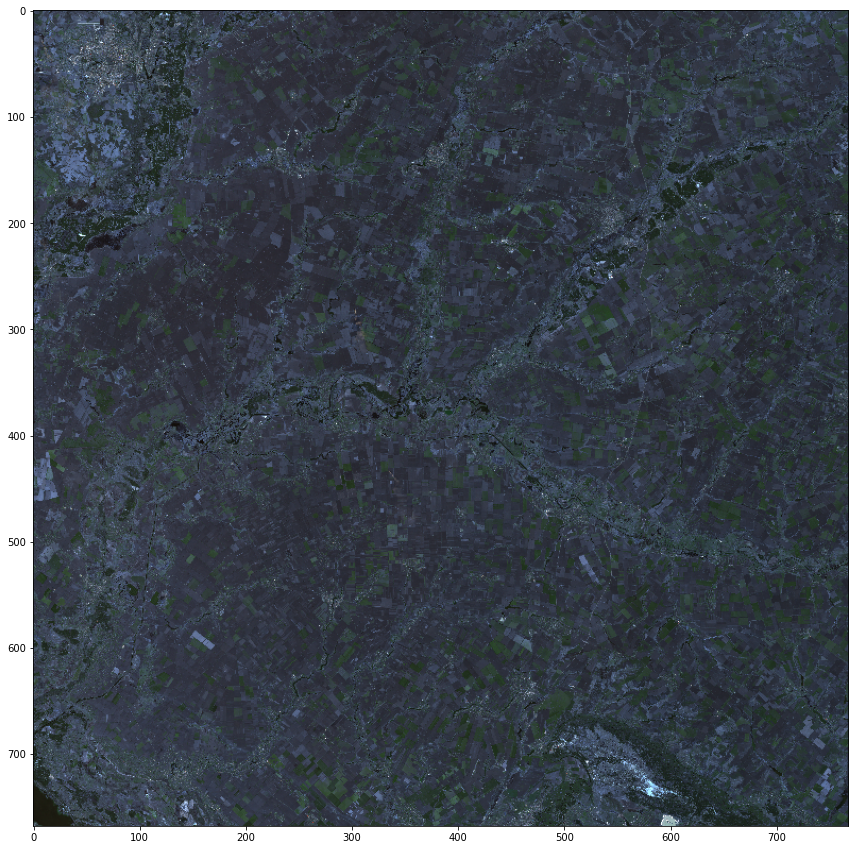

In [135]:
plt.figure(figsize=(15,15))
plt.imshow(raster_img)

In [136]:
raster_img.shape

(768, 768, 3)

In [137]:
train_df = gpd.read_file("masks/Masks_T36UXV_20190427.shp")

In [138]:
train_df.head(55)

,id,Data,Code,Descriptio,Comments,Image,geometry
0,NaN,NaT,2.0,branch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.62916 49.60293, 35.63015 49.60163..."
1,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.65070 49.60254, 35.65248 49.60301..."
2,NaN,NaT,2.0,brahch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.63023 49.60826, 35.62960 49.60920..."
3,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.62033 49.60905, 35.62064 49.60968..."
4,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.60455 49.61078, 35.60597 49.61228..."
5,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.60783 49.59848, 35.60736 49.59897..."
6,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.59871 49.60834, 35.59859 49.60857..."
7,NaN,NaT,2.0,branch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.58841 49.60416, 35.58869 49.60433..."
8,NaN,NaT,2.0,branch of tree,None,T36UXV_20190427T083601,"POLYGON ((35.59142 49.60402, 35.59172 49.60377..."
9,NaN,NaT,1.0,color+ feathers,None,T36UXV_20190427T083601,"POLYGON ((35.58347 49.61376, 35.58220 49.61355..."


In [139]:
src = rasterio.open(raster_path, 'r')
failed = []
for num, row in train_df.iterrows():
    try:
        masked_image, out_transform = rasterio.mask.mask(src, [mapping(row['geometry'])],crop=True, nodata=0)
    except:
        failed.append(num)
print("Rasterio failed to mask {} files".format(len(failed)))

Rasterio failed to mask 936 files


In [140]:
train_df = gpd.read_file("masks/Masks_T36UXV_20190427.shp")
train_df = train_df[train_df.geometry.notnull()]
train_df.crs = {'init':'epsg:4267'}
train_df = train_df.to_crs({'init':raster_meta['crs']['init']})

C:\Users\dzyub\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\dzyub\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [141]:
train_df['geometry'][0].exterior.coords.xy

(array('d', [689961.1517116707, 690037.4558485164, 690114.7721054466, 690121.458223043, 690034.5817996467, 689948.2566595278, 689890.125464285, 689858.7163120923, 689886.2935119569, 689961.1517116707]),
 array('d', [5497804.66695354, 5497662.463758821, 5497572.977673753, 5497463.459960388, 5497499.930817647, 5497602.273176699, 5497714.382352992, 5497796.695564403, 5497823.999880014, 5497804.66695354]))

In [142]:
#Creating masks
src = rasterio.open(raster_path, 'r', driver="JP2OpenJPEG")
outfolder = "article"
os.makedirs(outfolder, exist_ok=True)
failed = []
for num, row in train_df.iterrows():
    try:
        masked_image, out_transform = rasterio.mask.mask(src, [mapping(row['geometry'])], crop=True, nodata=0)
        img_image = reshape_as_image(masked_image)
        img_path = os.path.join(outfolder, str(row['Field_Id']) + '.png')
        img_image = cv2.cvtColor(img_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(img_path, img_image)
    except Exception as e:
        failed.append(num)
print("Rasterio failed to mask {} files".format(len(failed)))

Rasterio failed to mask 935 files


In [143]:
train_df.shape

(935, 7)

In [144]:
train_df.Comments.unique()

array([None, 'It`s difficult to diagnose the type',
       'Problem with mosaic (shares)', 'M.b. problem with shares',
       'm.b. hard detection', 'opodz soil (NGO)'], dtype=object)

In [145]:
#Drop comments, because almost all of them are None
train_df=train_df.drop(["Comments"],axis = 1)

In [146]:
train_df.isnull().sum()

id            935
Data          935
Code          596
Descriptio    601
Image         611
geometry        0
dtype: int64

In [147]:
#Drop description, because this column has strong correlation with column code
train_df=train_df.drop(["Descriptio"],axis = 1)

In [148]:
#Delete all rows in geometry with missing values and replace all Nan to 0 value
train_df=train_df.dropna(subset=['geometry'])
train_df = train_df.fillna(0)

In [149]:
train_df.head(50)

,id,Data,Code,Image,geometry
0,0.0,0,2.0,T36UXV_20190427T083601,"POLYGON ((689961.152 5497804.667, 690037.456 5..."
1,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((691518.623 5497815.456, 691645.003 5..."
2,0.0,0,2.0,T36UXV_20190427T083601,"POLYGON ((690017.383 5498399.293, 689968.112 5..."
3,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((689299.133 5498462.011, 689319.252 5..."
4,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((688152.716 5498615.331, 688249.512 5..."
5,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((688436.974 5497256.119, 688401.319 5..."
6,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((687740.426 5498328.884, 687730.969 5..."
7,0.0,0,2.0,T36UXV_20190427T083601,"POLYGON ((687012.326 5497839.285, 687031.579 5..."
8,0.0,0,2.0,T36UXV_20190427T083601,"POLYGON ((687230.249 5497830.937, 687252.797 5..."
9,0.0,0,1.0,T36UXV_20190427T083601,"POLYGON ((686618.928 5498894.089, 686527.840 5..."


In [150]:
train_df.shape

(935, 5)

In [151]:
# Drop data column, because all values are Nan and replace all Nan values in ID column to numbered
train_df=train_df.drop(["id"],axis = 1)
train_df=train_df.drop(["Data"],axis = 1)

In [152]:
train_df.insert(0, 'ID', range(0, 0 + len(train_df)))

In [153]:
train_df.head(100)

,ID,Code,Image,geometry
0,0,2.0,T36UXV_20190427T083601,"POLYGON ((689961.152 5497804.667, 690037.456 5..."
1,1,1.0,T36UXV_20190427T083601,"POLYGON ((691518.623 5497815.456, 691645.003 5..."
2,2,2.0,T36UXV_20190427T083601,"POLYGON ((690017.383 5498399.293, 689968.112 5..."
3,3,1.0,T36UXV_20190427T083601,"POLYGON ((689299.133 5498462.011, 689319.252 5..."
4,4,1.0,T36UXV_20190427T083601,"POLYGON ((688152.716 5498615.331, 688249.512 5..."
...,...,...,...,...
95,95,0.0,0,"POLYGON ((636661.089 5492599.661, 636745.764 5..."
96,96,0.0,0,"POLYGON ((636973.133 5492227.476, 636977.486 5..."
97,97,0.0,0,"POLYGON ((637137.906 5492085.672, 637191.551 5..."
98,98,0.0,0,"POLYGON ((638521.202 5491633.489, 638546.944 5..."


In [154]:
# Split into training and validation groups
train, valid = train_test_split(train_df, 
                 test_size = 0.2, 
                 random_state=42)

print(train.shape[0],  'training masks')
print(valid.shape[0],  'validation masks')


748 training masks
187 validation masks


C:\Users\dzyub\AppData\Local\Temp\ipykernel_13484\988204699.py:7: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  poly = cascaded_union(polygon)


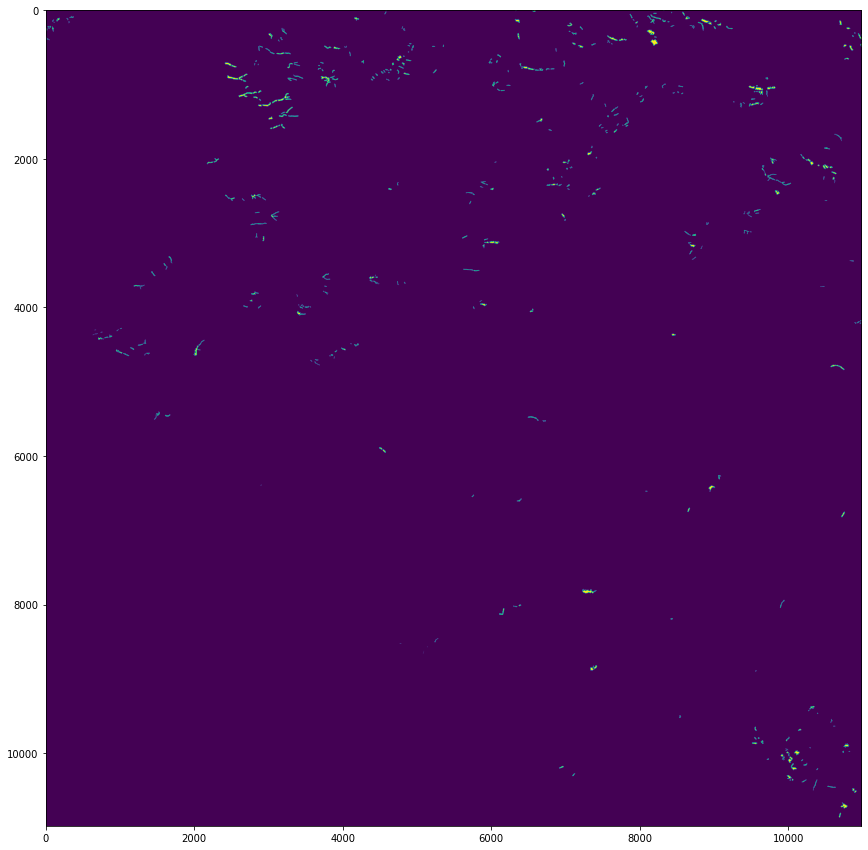

In [155]:
# rasterize works with polygons that are in image coordinate system

def poly_from_utm(polygon, transform):
    poly_pts = []
    
    # make a polygon from multipolygon
    poly = cascaded_union(polygon)
    for i in np.array(poly.exterior.coords):
        
        # transfrom polygon to image crs, using raster meta
        poly_pts.append(~transform * tuple(i))
        
    # make a shapely Polygon object
    new_poly = Polygon(poly_pts)
    return new_poly

# creating binary mask for field/not_filed segmentation.

poly_shp = []
im_size = (src.meta['height'], src.meta['width'])
for num, row in train_df.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        poly = poly_from_utm(row['geometry'], src.meta['transform'])
        poly_shp.append(poly)
    else:
        for p in row['geometry']:
            poly = poly_from_utm(p, src.meta['transform'])
            poly_shp.append(poly)

mask = rasterize(shapes=poly_shp,
                 out_shape=im_size)

# plotting the mask

plt.figure(figsize=(15,15))
plt.imshow(mask)

In [156]:
#Make a generator to produce batches of images
IMG_SCALING = (1,1)

def keras_generator(gen_df, batch_size=4):
    all_batches = list(gen_df.groupby('ID'))
    out_rgb = []
    out_mask = []
    while True:
        np.random.shuffle(all_batches)
        for c_img_id, c_masks in all_batches:
            rgb_path = raster_img
            c_img = raster_img
            c_mask = mask
            if IMG_SCALING is not None:
                c_img = c_img[::IMG_SCALING[0], ::IMG_SCALING[1]]
                c_mask = c_mask[::IMG_SCALING[0], ::IMG_SCALING[1]]
            out_rgb += [c_img]
            out_mask += [c_mask]
            if len(out_rgb)>=batch_size:
                yield np.stack(out_rgb, 0)/255.0, np.stack(out_mask, 0)
                out_rgb, out_mask=[], []

In [157]:
#Checking the dimension
train_gen = keras_generator(train,5)
train_x, train_y = next(train_gen)
print('x', train_x.shape, train_x.dtype, train_x.min(), train_x.max())
print('y', train_y.shape, train_y.dtype, train_y.min(), train_y.max())

x (5, 768, 768, 3) float64 0.023529411764705882 1.0
y (5, 10980, 10980) uint8 0 1


In [158]:
#Building Unet model
inp = Input(shape=(768, 768, 3))

# first block
conv_1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
conv_1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv_1_1)
pool_1 = MaxPooling2D(2)(conv_1_2)


# second block
conv_2_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool_1)
conv_2_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_2_1)
pool_2 = MaxPooling2D(2)(conv_2_2)


# third block
conv_3_1 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool_2)
conv_3_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_3_1)
pool_3 = MaxPooling2D(2)(conv_3_2)
print(conv_3_2)

# fourth block
conv_4_1 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool_3)
conv_4_2 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_4_1)
pool_4 = MaxPooling2D(2)(conv_4_2)


# fifth block
conv_5_1 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool_4)
conv_5_2 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv_5_1)
pool_5 = MaxPooling2D(2)(conv_5_2)


# first decoding block
up_1 = UpSampling2D(2, interpolation='bilinear')(pool_5)
conc_1 = Concatenate()([conv_5_2, up_1])
conv_up_1_1 = Conv2D(512, (3, 3), activation='relu', padding='same')(conc_1)
conv_up_1_2 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv_up_1_1)

# second decoding block
up_2 = UpSampling2D(2, interpolation='bilinear')(conv_up_1_2)
conc_2 = Concatenate()([conv_4_2, up_2])
conv_up_2_1 = Conv2D(256, (3, 3), activation='relu', padding='same')(conc_2)
conv_up_2_2 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_up_2_1)


# third decodinc block
up_3 = UpSampling2D(2, interpolation='bilinear')(conv_up_2_2)
print(up_3)
conc_3 = Concatenate()([conv_3_2, up_3])
conv_up_3_1 = Conv2D(128, (3, 3), activation='relu', padding='same')(conc_3)
conv_up_3_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv_up_3_1)

# fourth decoding block
up_4 = UpSampling2D(2, interpolation='bilinear')(conv_up_3_2)
conc_4 = Concatenate()([conv_2_2, up_4])
conv_up_4_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conc_4)
conv_up_4_2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv_up_4_1)

# fifth decoding block
up_5 = UpSampling2D(2, interpolation='bilinear')(conv_up_4_2)
conc_5 = Concatenate()([conv_1_2, up_5])
conv_up_5_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conc_5)
conv_up_5_2 = Conv2D(1, (3, 3), padding='same')(conv_up_5_1)
result = Activation('sigmoid')(conv_up_5_2)


unet_model = Model(inputs=inp, outputs=result)

unet_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 192, 192, 128), dtype=tf.float32, name=None), name='conv2d_85/Relu:0', description="created by layer 'conv2d_85'")
KerasTensor(type_spec=TensorSpec(shape=(None, 192, 192, 256), dtype=tf.float32, name=None), name='up_sampling2d_22/resize/ResizeBilinear:0', description="created by layer 'up_sampling2d_22'")
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 768, 768, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 768, 768, 32  896         ['input_5[0][0]']                
                                )   

 )                              8)                                                                
                                                                                                  
 concatenate_23 (Concatenate)   (None, 384, 384, 19  0           ['conv2d_83[0][0]',              
                                2)                                'up_sampling2d_23[0][0]']       
                                                                                                  
 conv2d_96 (Conv2D)             (None, 384, 384, 64  110656      ['concatenate_23[0][0]']         
                                )                                                                 
                                                                                                  
 conv2d_97 (Conv2D)             (None, 384, 384, 64  36928       ['conv2d_96[0][0]']              
                                )                                                                 
          

In [159]:
# Callbacks
best_w = keras.callbacks.ModelCheckpoint('best_unet.w',
                                        monitor='val_loss',
                                        verbose=0,
                                        save_best_only=True,
                                        save_weights_only=True,
                                        mode='auto',
                                        patience=1)

last_w = keras.callbacks.ModelCheckpoint('last_unet.w',
                                        monitor='val_loss',
                                        verbose=0,
                                        save_best_only=False,
                                        save_weights_only=True,
                                        mode='auto',
                                        patience=20)

callbacks = [best_w, last_w]

In [161]:
# IoU of soil erosion
def IoU(y_true, y_pred, eps=1e-6):
    y_true=K.cast(y_true, 'float32')
    y_pred = K.cast(y_pred, 'float32')

    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) - intersection
    return K.mean( (intersection + eps) / (union + eps), axis=0)

# IoU of non-boats
def zero_IoU(y_true, y_pred):
    return IoU(1-y_true, 1-y_pred)

def agg_loss(in_gt, in_pred):
    return -1e-2 * zero_IoU(in_gt, in_pred) - IoU(in_gt, in_pred)

# Optimizer
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)  
  
unet_model.compile(optimizer=adam, loss=agg_loss, metrics=[IoU, zero_IoU, 'binary_accuracy'])

In [162]:
loss_history = [unet_model.fit_generator(keras_generator(train),
                                        steps_per_epoch=100, 
                                        epochs=5, 
                                        validation_data=keras_generator(valid),
                                        validation_steps=50,
                                        callbacks=callbacks)]

C:\Users\dzyub\AppData\Local\Temp\ipykernel_13484\528379677.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  loss_history = [unet_model.fit_generator(keras_generator(train),


Epoch 1/5


ValueError: in user code:

    File "C:\Users\dzyub\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\dzyub\AppData\Local\Temp\ipykernel_13484\4126448862.py", line 15, in agg_loss  *
        return -1e-2 * zero_IoU(in_gt, in_pred) - IoU(in_gt, in_pred)
    File "C:\Users\dzyub\AppData\Local\Temp\ipykernel_13484\4126448862.py", line 12, in zero_IoU  *
        return IoU(1-y_true, 1-y_pred)
    File "C:\Users\dzyub\AppData\Local\Temp\ipykernel_13484\4126448862.py", line 6, in IoU  *
        intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    File "C:\Users\dzyub\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 2544, in sum
        return tf.reduce_sum(x, axis, keepdims)

    ValueError: Invalid reduction dimension 3 for input with 3 dimensions. for '{{node agg_loss/Sum}} = Sum[T=DT_FLOAT, Tidx=DT_INT32, keep_dims=false](agg_loss/mul, agg_loss/Sum/reduction_indices)' with input shapes: [?,768,768], [3] and with computed input tensors: input[1] = <1 2 3>.
